In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#import cognitive data metrics
cogdata = pd.read_csv('/home/jovyan/brain-bridge/data/cogtotals.csv')

#print("Dataset shape:", cogdata.shape)

#rename column to match imaging data file
cogdata.rename(columns={"Subject": "id"}, inplace = True)
cogdata.head()

# delete ids without cog score - assuming missing data is represented by NaN values
missing_data_rows = cogdata[cogdata.isnull().any(axis=1)]
clean_cog_data = cogdata.dropna()
#clean_cog_data.head()
clean_cog_data.to_csv('/home/jovyan/brain-bridge/data/clean_cog_data.csv', index=False)
clean_cog_data = pd.read_csv('/home/jovyan/brain-bridge/data/clean_cog_data.csv')
clean_cog_data.head()
#len(clean_cog_data)

#import ids for subjects with imaging metrics
imagingdata = pd.read_csv('/home/jovyan/brain-bridge/data/freesurfer_diffusion_HCP.csv')

#print("Dataset shape:", imagingdata.shape)
#imagingdata.head()

#find overlap in subjects
set1 = (clean_cog_data['id']).to_list()
set2 = (imagingdata['id']).to_list()

new_list = [value for value in set1 if value in set2]
df = pd.DataFrame(new_list)
df
len(new_list)

1027

In [161]:
#pull cog data for those that have overlapping structural data
selected_cog_data = clean_cog_data[clean_cog_data['id'].isin(new_list)]
#len(selected_cog_data)
#print(selected_cog_data)

#pull structural data for those that have overlapping cog data
structuraldata = pd.read_csv('/home/jovyan/brain-bridge/data/all_structural_metrics_HCP.csv')
#rename first column to ids
structuraldata.columns = structuraldata.columns.str.replace('Unnamed: 0','id')
selected_struc_data = structuraldata[structuraldata['id'].isin(new_list)]
selected_struc_data = selected_struc_data.dropna()
selected_struc_data
#len(selected_struc_data)
#print(selected_struc_data)

,id,lh_G_and_S_frontomargin_NumVert,lh_G_and_S_occipital_inf_NumVert,lh_G_and_S_paracentral_NumVert,lh_G_and_S_subcentral_NumVert,lh_G_and_S_transv_frontopol_NumVert,lh_G_and_S_cingul-Ant_NumVert,lh_G_and_S_cingul-Mid-Ant_NumVert,lh_G_and_S_cingul-Mid-Post_NumVert,lh_G_cingul-Post-dorsal_NumVert,...,rh_S_parieto_occipital_CurvInd,rh_S_pericallosal_CurvInd,rh_S_postcentral_CurvInd,rh_S_precentral-inf-part_CurvInd,rh_S_precentral-sup-part_CurvInd,rh_S_suborbital_CurvInd,rh_S_subparietal_CurvInd,rh_S_temporal_inf_CurvInd,rh_S_temporal_sup_CurvInd,rh_S_temporal_transverse_CurvInd
0,857263,854,1198,1747,1327,773,2589,1666,1604,639,...,5.1,5.2,4.7,2.6,3.7,0.3,4.1,1.8,10.1,0.4
1,133928,1123,1723,1771,1036,676,2674,1476,1605,681,...,4.8,5.2,4.8,7.2,2.8,1.0,3.3,2.5,8.7,0.7
2,101006,1038,1621,1252,1073,496,1697,1296,1006,442,...,3.5,8.0,2.5,1.1,1.3,0.4,2.1,1.7,7.9,0.5
3,788876,884,1250,1275,1023,394,2217,1101,1090,637,...,3.9,3.7,2.7,1.4,2.7,0.3,2.3,1.7,6.8,0.4
4,731140,1189,1423,1810,1462,486,2310,1257,1457,610,...,4.5,16.4,3.2,2.1,1.5,0.6,3.5,1.2,8.3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,197550,1061,1362,1771,1216,612,2025,1178,1131,503,...,3.4,3.0,4.1,1.3,1.8,0.3,1.8,1.1,7.4,0.6
1038,106016,1358,1770,1663,1475,872,2207,1607,1496,469,...,4.3,5.7,2.4,2.4,1.8,0.7,2.6,2.5,11.2,0.4
1039,590047,1412,1590,1684,1787,736,3019,1669,1506,527,...,6.2,10.6,5.0,3.2,3.6,1.4,6.0,3.0,10.5,0.8
1040,179245,1214,1768,1670,1171,802,2026,1190,1177,508,...,3.8,3.8,2.7,1.7,2.9,0.8,2.6,1.6,6.0,0.3


In [162]:
#extract gray matter volume variables
grayvol_columns = selected_struc_data.filter(like='GrayVol', axis=1)
grayvol_columns.insert(0, 'id', structuraldata['id'])
grayvol_columns['id'] = grayvol_columns['id'].astype(int)
grayvol_df = grayvol_columns.sort_values(by='id')

#merge cognitive data and gray matter volume data
cognitive_gray_vol_data = pd.merge(selected_cog_data, grayvol_df)
grayvol_df

/tmp/ipykernel_188/343903097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grayvol_columns['id'] = grayvol_columns['id'].astype(int)


,id,lh_G_and_S_frontomargin_GrayVol,lh_G_and_S_occipital_inf_GrayVol,lh_G_and_S_paracentral_GrayVol,lh_G_and_S_subcentral_GrayVol,lh_G_and_S_transv_frontopol_GrayVol,lh_G_and_S_cingul-Ant_GrayVol,lh_G_and_S_cingul-Mid-Ant_GrayVol,lh_G_and_S_cingul-Mid-Post_GrayVol,lh_G_cingul-Post-dorsal_GrayVol,...,rh_S_parieto_occipital_GrayVol,rh_S_pericallosal_GrayVol,rh_S_postcentral_GrayVol,rh_S_precentral-inf-part_GrayVol,rh_S_precentral-sup-part_GrayVol,rh_S_suborbital_GrayVol,rh_S_subparietal_GrayVol,rh_S_temporal_inf_GrayVol,rh_S_temporal_sup_GrayVol,rh_S_temporal_transverse_GrayVol
54,100206,3059,3204,2234,3768,1946,6873,4225,3141,2412,...,4394,2269,3990,3789,2362,709.0,2553,2160,14681,747
819,100307,2043,2173,2592,3749,2017,5696,2453,2599,1502,...,3568,1319,3216,2265,2266,369.0,1755,2434,9708,545
724,100408,2730,2622,2199,3930,1912,6020,3291,3175,1792,...,4011,1522,3941,3373,1829,436.0,2283,2422,10639,519
1041,100610,2669,3535,2818,2913,1910,5464,3515,2678,1789,...,3545,1721,2540,2560,2758,395.0,1489,2435,11670,413
2,101006,1879,3139,2102,2105,1067,3691,2539,1878,1176,...,2858,3456,3413,1478,1834,516.0,1900,2056,8558,523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,992774,2439,3715,2520,3008,1339,4342,2545,2216,1419,...,3090,1766,2623,2352,2019,870.0,1879,1533,11797,371
208,993675,2028,3376,2262,3491,1289,5453,2563,2986,1623,...,2370,1903,3794,2670,2000,460.0,3328,1779,8992,440
401,994273,2227,3101,2240,3574,1209,5871,2570,2571,2119,...,3631,1725,3482,2693,1625,892.0,2269,2676,13477,588
129,995174,2391,2871,2505,3279,1485,5470,3128,2469,1718,...,2995,1874,3950,2451,3163,840.0,2240,2030,10306,611


In [163]:
#extract surface area variables
surf_columns = selected_struc_data.filter(like='SurfArea', axis=1)
surf_columns.insert(0, 'id', structuraldata['id'])
surf_columns['id'] = surf_columns['id'].astype(int)
surf_df = surf_columns.sort_values(by='id')

#merge cognitive data and surface area data
cognitive_surf_data = pd.merge(selected_cog_data, surf_df)
cognitive_surf_data

/tmp/ipykernel_188/3585527043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf_columns['id'] = surf_columns['id'].astype(int)


,id,CogTotalComp_AgeAdj,lh_G_and_S_frontomargin_SurfArea,lh_G_and_S_occipital_inf_SurfArea,lh_G_and_S_paracentral_SurfArea,lh_G_and_S_subcentral_SurfArea,lh_G_and_S_transv_frontopol_SurfArea,lh_G_and_S_cingul-Ant_SurfArea,lh_G_and_S_cingul-Mid-Ant_SurfArea,lh_G_and_S_cingul-Mid-Post_SurfArea,...,rh_S_parieto_occipital_SurfArea,rh_S_pericallosal_SurfArea,rh_S_postcentral_SurfArea,rh_S_precentral-inf-part_SurfArea,rh_S_precentral-sup-part_SurfArea,rh_S_suborbital_SurfArea,rh_S_subparietal_SurfArea,rh_S_temporal_inf_SurfArea,rh_S_temporal_sup_SurfArea,rh_S_temporal_transverse_SurfArea
0,100206,133.76,1098,1093,820,1156,602,2078,1265,1067,...,1994,1388,1897,1485,1002,308.0,1154,944,5652,267
1,100307,106.85,627,785,878,1104,521,1678,807,837,...,1604,775,1482,928,1008,115.0,601,991,3606,256
2,100408,133.96,1014,1050,790,1213,586,1845,1035,1043,...,1804,1173,1913,1415,825,181.0,921,1063,4289,251
3,100610,153.36,919,1269,883,813,548,1593,1088,949,...,1507,1128,1331,1061,1191,155.0,609,1089,4572,170
4,101006,72.15,687,1059,650,708,316,1120,863,691,...,1330,2323,1699,654,839,202.0,717,888,3446,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,992774,96.24,875,1298,821,936,391,1335,773,789,...,1334,959,1265,992,871,269.0,681,608,4482,135
1022,993675,135.54,714,992,791,972,407,1604,866,1009,...,902,1061,1737,1092,925,168.0,1358,712,3333,187
1023,994273,117.06,724,1020,711,1019,356,1712,799,885,...,1629,1177,1578,1127,758,261.0,887,1057,4898,213
1024,995174,99.56,775,982,797,829,418,1681,1007,817,...,1335,981,1697,961,1272,282.0,811,833,3775,200


In [164]:
#extract thickness variables
thick_columns = selected_struc_data.filter(like='ThickAvg', axis=1)
thick_columns.insert(0, 'id', structuraldata['id'])
thick_columns['id'] = thick_columns['id'].astype(int)
thick_df = thick_columns.sort_values(by='id')

#merge cognitive data and surface area data
cognitive_thick_data = pd.merge(selected_cog_data, thick_df)
cognitive_thick_data

/tmp/ipykernel_188/3766796814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thick_columns['id'] = thick_columns['id'].astype(int)


,id,CogTotalComp_AgeAdj,lh_G_and_S_frontomargin_ThickAvg,lh_G_and_S_occipital_inf_ThickAvg,lh_G_and_S_paracentral_ThickAvg,lh_G_and_S_subcentral_ThickAvg,lh_G_and_S_transv_frontopol_ThickAvg,lh_G_and_S_cingul-Ant_ThickAvg,lh_G_and_S_cingul-Mid-Ant_ThickAvg,lh_G_and_S_cingul-Mid-Post_ThickAvg,...,rh_S_parieto_occipital_ThickAvg,rh_S_pericallosal_ThickAvg,rh_S_postcentral_ThickAvg,rh_S_precentral-inf-part_ThickAvg,rh_S_precentral-sup-part_ThickAvg,rh_S_suborbital_ThickAvg,rh_S_subparietal_ThickAvg,rh_S_temporal_inf_ThickAvg,rh_S_temporal_sup_ThickAvg,rh_S_temporal_transverse_ThickAvg
0,100206,133.76,2.666,2.570,2.257,2.891,2.559,3.062,3.005,2.700,...,2.293,1.788,2.254,2.690,2.431,2.493,2.308,2.651,2.659,2.903
1,100307,106.85,2.830,2.517,2.330,2.780,3.033,3.086,3.042,2.880,...,2.439,2.041,2.298,2.690,2.542,3.374,2.721,2.731,2.830,2.496
2,100408,133.96,2.577,2.307,2.305,2.712,2.574,2.977,2.859,2.706,...,2.395,1.636,2.253,2.505,2.452,2.826,2.585,2.659,2.614,2.513
3,100610,153.36,2.675,2.446,2.514,2.876,2.774,3.123,2.976,2.700,...,2.448,1.773,2.146,2.618,2.609,3.060,2.441,2.571,2.644,2.782
4,101006,72.15,2.473,2.510,2.424,2.581,2.536,2.999,2.746,2.601,...,2.307,1.364,2.149,2.509,2.492,2.832,2.655,2.724,2.604,2.748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,992774,96.24,2.548,2.432,2.428,2.777,2.698,2.949,2.921,2.706,...,2.475,2.152,2.238,2.646,2.572,3.615,2.736,2.809,2.724,2.629
1022,993675,135.54,2.552,2.835,2.291,2.756,2.474,3.020,2.799,2.666,...,2.363,1.841,2.247,2.684,2.507,2.818,2.566,2.738,2.742,2.828
1023,994273,117.06,2.665,2.434,2.503,2.908,2.603,3.119,2.995,2.812,...,2.341,1.788,2.442,2.781,2.508,3.199,2.679,2.812,2.810,3.147
1024,995174,99.56,2.701,2.537,2.523,3.237,2.701,2.934,2.990,2.719,...,2.363,2.130,2.471,2.793,2.663,2.771,2.712,2.754,2.935,3.080


In [165]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge

est = Ridge(100)

pipeline = Pipeline([
    ('feature selection', SelectKBest(f_regression, k=10)),
    ('OLS', est),
])

In [166]:
#model for gray matter volume
X_sets = [grayvol_df]
labels = ['10 "best" features']
estimators = [est, est, pipeline]


In [167]:
from sklearn.model_selection import train_test_split

X = grayvol_df.drop(columns=['id'])

y = cognitive_gray_vol_data['CogTotalComp_AgeAdj']
#print(y)
#len(y)

(X_train, X_test, y_train, y_test)= train_test_split(X, y, test_size = 0.3, random_state = 42)

In [168]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Standardize the features using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [169]:
X_train_scaled.shape

(718, 148)

In [170]:
len(y_train)

718

In [171]:
X_tmp = pd.DataFrame(X_train_scaled)
print(X_tmp[X_tmp.isna().any(axis=1)])

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 148 columns]


In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize a regression model (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Predict cognitive scores on the test data
y_pred = model.predict(X_test_scaled)

In [173]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 415.58515248848636
R-squared: -0.04764828897650841


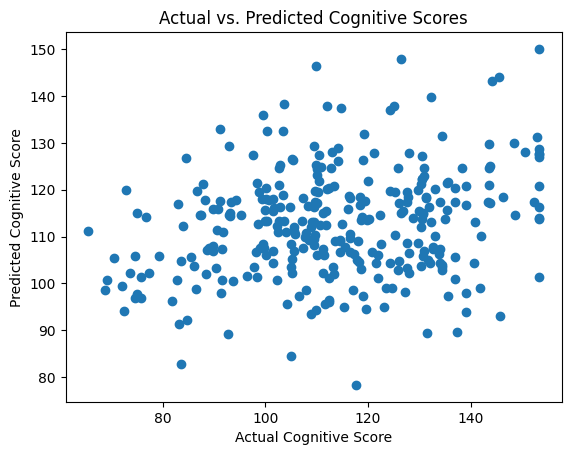

In [175]:
# Visualize actual vs. predicted cognitive scores
#x_range = np.linspace(X.min(), X.max(), 100)
#reg_line = est.predict(x_range[:, None])

plt.scatter(y_test, y_pred)
#plt.plot(x_range, reg_line)
plt.xlabel("Actual Cognitive Score")
plt.ylabel("Predicted Cognitive Score")
plt.title("Actual vs. Predicted Cognitive Scores")
plt.show()

In [186]:
import statsmodels.api as sm

tmp_X = sm.tools.add_constant(X_train_scaled)
ols = sm.OLS(y_train, tmp_X)
ols.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CogTotalComp_AgeAdj   R-squared:                       0.042
Model:                             OLS   Adj. R-squared:                  0.041
Method:                  Least Squares   F-statistic:                     31.74
Date:                 Wed, 16 Aug 2023   Prob (F-statistic):           2.54e-08
Time:                         23:36:28   Log-Likelihood:                -3174.0
No. Observations:                  718   AIC:                             6352.
Df Residuals:                      716   BIC:                             6361.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        113.2221      0.752    150.590      0.000     111.746     114.698
x1             4.2355      0.752      5.633      0.000       2.759       5.712
==============================================================================
Omnibus:                       20.361   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.367
Skew:                          -0.035   Prob(JB):                      0.00561
Kurtosis:                       2.416   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [176]:
#model for surface area
X_sets = [surf_df]
labels = ['10 "best" features']
estimators = [est, est, pipeline]

In [177]:
from sklearn.model_selection import train_test_split

X = surf_df.drop(columns=['id'])

y = cognitive_surf_data['CogTotalComp_AgeAdj']
#print(y)
#len(y)

(X_train, X_test, y_train, y_test)= train_test_split(X, y, test_size = 0.3, random_state = 42)

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Standardize the features using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
X_train_scaled.shape

(718, 148)

In [180]:
len(y_train)

718

In [181]:
X_tmp = pd.DataFrame(X_train_scaled)
print(X_tmp[X_tmp.isna().any(axis=1)])

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 148 columns]


In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize a regression model (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Predict cognitive scores on the test data
y_pred = model.predict(X_test_scaled)

In [183]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 419.4769657811215
R-squared: -0.05745915809113167


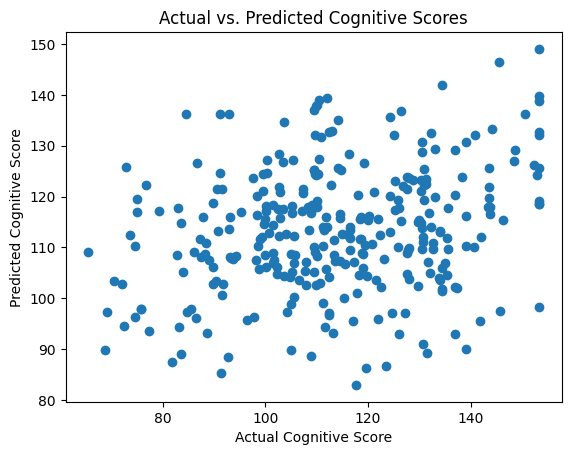

In [184]:
# Visualize actual vs. predicted cognitive scores

plt.scatter(y_test, y_pred)
#plt.plot(x_range, reg_line)
plt.xlabel("Actual Cognitive Score")
plt.ylabel("Predicted Cognitive Score")
plt.title("Actual vs. Predicted Cognitive Scores")
plt.show()

In [193]:
#model for thickness
X_sets = [thick_df]
labels = ['10 "best" features']
estimators = [est, est, pipeline]

In [194]:
from sklearn.model_selection import train_test_split

X = thick_df.drop(columns=['id'])

y = cognitive_thick_data['CogTotalComp_AgeAdj']
#print(y)
#len(y)

(X_train, X_test, y_train, y_test)= train_test_split(X, y, test_size = 0.3, random_state = 42)

In [195]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Standardize the features using StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [196]:
X_train_scaled.shape

(718, 148)

In [197]:
len(y_train)

718

In [198]:
X_tmp = pd.DataFrame(X_train_scaled)
print(X_tmp[X_tmp.isna().any(axis=1)])

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 148 columns]


In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize a regression model (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Predict cognitive scores on the test data
y_pred = model.predict(X_test_scaled)

In [200]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 454.7159669414077
R-squared: -0.1462931288183169


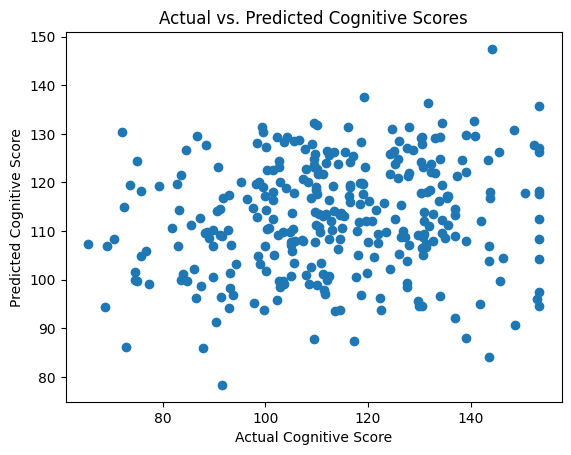

In [201]:
# Visualize actual vs. predicted cognitive scores

plt.scatter(y_test, y_pred)
#plt.plot(x_range, reg_line)
plt.xlabel("Actual Cognitive Score")
plt.ylabel("Predicted Cognitive Score")
plt.title("Actual vs. Predicted Cognitive Scores")
plt.show()